# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Data

In [3]:
data_df=pd.read_csv('Average_UK_houseprices_and_salary.csv')
data_df.drop('Unnamed: 3', axis=1, inplace=True) # not sure why that column is there
data_df.head()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds)
0,1975,94983,NaN
1,1976,89281,NaN
2,1977,85028,NaN
3,1978,100519,NaN
4,1979,112067,NaN


In [4]:
paygap_df=pd.read_csv('Income_by_age_and_gender.csv')
paygap_df

,Age group,Median salary (pounds),Gender
0,18 to 21,18392,Male
1,22 to 29,26856,Male
2,30 to 39,34210,Male
3,40 to 49,38463,Male
4,50 to 59,36000,Male
5,60 and over,30944,Male
6,18 to 21,17005,Female
7,22 to 29,25115,Female
8,30 to 39,30540,Female
9,40 to 49,31679,Female


# Average house prices

Text(0, 0.5, 'Average price adjusted by inflation (£)')

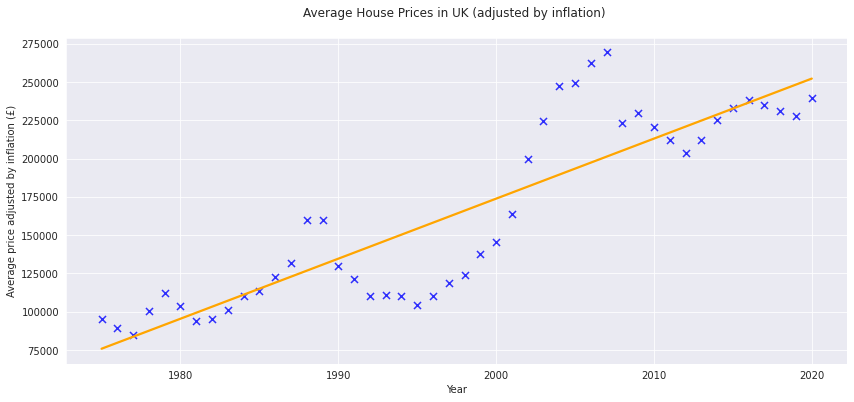

In [5]:
# Figure size
plt.figure(figsize=(14,6))

# Scatterplot with regression lines
sns.regplot(x='Year', y='Average house price adj. by inflation (pounds)', data=data_df, 
            marker='x', scatter_kws={"s": 50, 'color':'blue'}, line_kws={"color": "orange"}, ci=False)

# Aesthetics
plt.title('Average House Prices in UK (adjusted by inflation) \n')
plt.ylabel('Average price adjusted by inflation (£)')

**Regression line**

In [6]:
# Slope of regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df['Year'],
                                                               data_df['Average house price adj. by inflation (pounds)'])

print('The slope of the regression line is: £','{:.2f}'.format(slope))

The slope of the regression line is: £ 3920.94


**Observations:**
* The regression line tells us that houses prices are **increasing** each year on average **after inflation has been taken into account.** By nearly £4000 a year! 
* We also see that houses prices took a serious drop in 2008/2009 due to the housing market crash at that time. 
* In the space of 45 years, the average house price has increased from roughly £100,000 to £250,000. That is a 250% increase!


# Average wages

Text(0, 0.5, 'Average wage adjusted by inflation (£)')

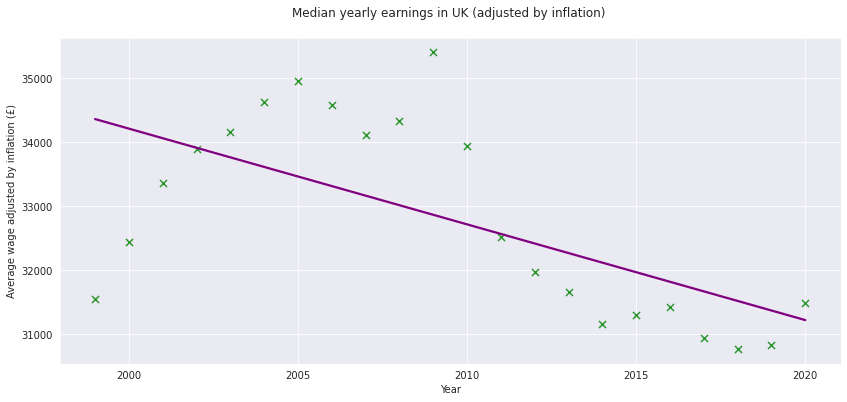

In [7]:
# Figure size
plt.figure(figsize=(14,6))

# Scatterplot with regression lines
sns.regplot(x='Year', y='Median Salary adj. by inflation (pounds)', data=data_df, 
            marker='x', scatter_kws={"s": 50, 'color':'green'}, line_kws={"color": "purple"}, ci=False)

# Aesthetics
plt.title('Median yearly earnings in UK (adjusted by inflation) \n')
plt.ylabel('Average wage adjusted by inflation (£)')

In [8]:
# Slope of regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df.iloc[24:,0],
                                                               data_df.iloc[24:,2])

print('The slope of the regression line is: £','{:.2f}'.format(slope))

The slope of the regression line is: £ -149.39


**Observations:**
* The average salary in the UK is actually **decreasing** (by £150) each year on average after inflation has been taken into account. 
* It seems they took the biggest hit just after the housing market crash of 2008-2009. 
* Whilst house prices bounced back after 2010, wages have not. 

# Bonus Section: The Pay Gap

On the theme of unfairness I thought I would also thrown in some analysis of this interesting dataset. 

Text(0.5, 1.0, 'Average UK wages in 2021 by age group and gender \n')

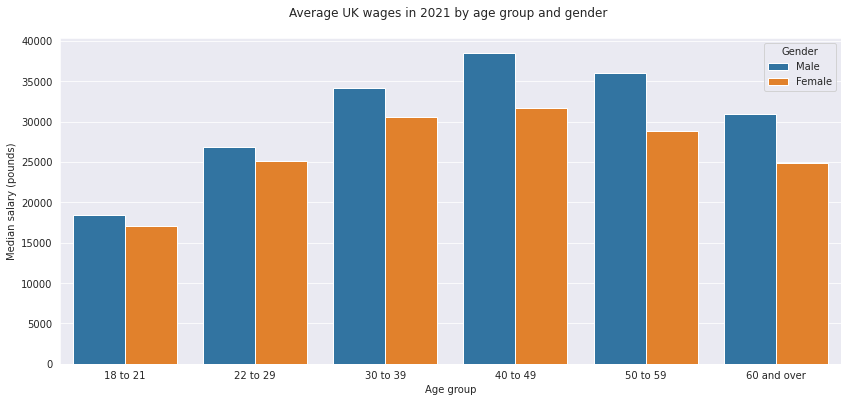

In [9]:
# Figure size
plt.figure(figsize=(14,6))

# Scatterplot with regression lines
sns.barplot(x='Age group', y='Median salary (pounds)', data=paygap_df, hue='Gender')

# Aesthetics
plt.title('Average UK wages in 2021 by age group and gender \n')

**Observations:**
* Wages increase with age until the 40-49 age group. They then decrease for over 50's.
* Men out-earn Women in every age group.
* The pay gap increases with age. 



# EDA

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
plt.style.use('fivethirtyeight') 
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [14]:
data_df.head(5)

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds)
0,1975,94983,NaN
1,1976,89281,NaN
2,1977,85028,NaN
3,1978,100519,NaN
4,1979,112067,NaN


In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            46 non-null     int64  
 1   Average house price adj. by inflation (pounds)  46 non-null     int64  
 2   Median Salary adj. by inflation (pounds)        22 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [16]:
data_df.describe()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds)
count,46.000000,46.000000,22.000000
mean,1997.500000,164014.717391,32791.958182
std,13.422618,60004.318931,1548.767865
min,1975.000000,85028.000000,30772.440000
25%,1986.250000,110149.250000,31436.870000
50%,1997.500000,141578.500000,32484.225000
75%,2008.750000,225347.750000,34145.020000
max,2020.000000,269297.000000,35399.830000


In [17]:
data_df.shape

(46, 3)

In [18]:
print(data_df.isnull().sum())

Year                                               0
Average house price adj. by inflation (pounds)     0
Median Salary adj. by inflation (pounds)          24
dtype: int64


In [19]:
# To know how data are related to each other
data_df.corr()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds)
Year,1.000000,0.877091,-0.626351
Average house price adj. by inflation (pounds),0.877091,1.000000,0.227437
Median Salary adj. by inflation (pounds),-0.626351,0.227437,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


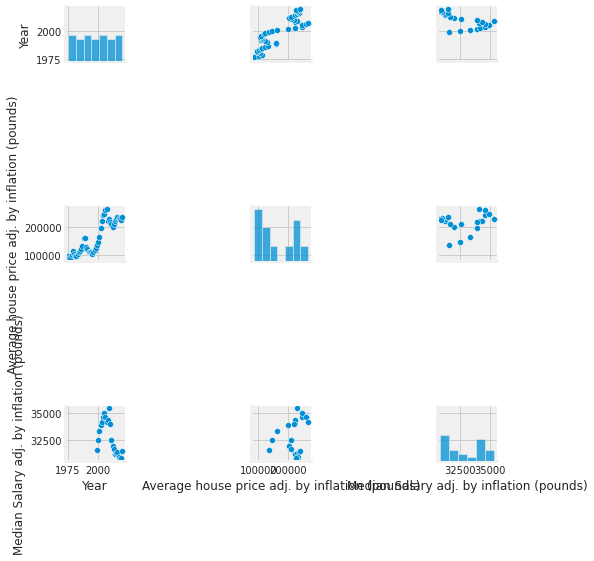

In [20]:
#visualization for seeing the correlation
sns.pairplot(data_df)

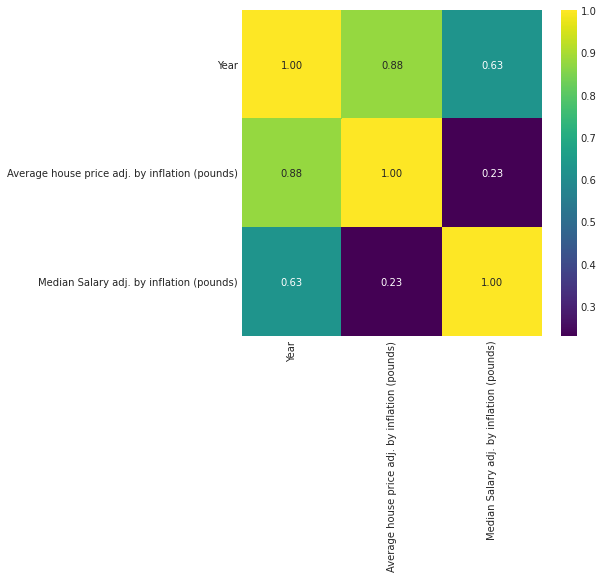

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(np.abs(data_df.corr()), annot = True, cmap = "viridis", fmt = "0.2f")

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
y=data_df.iloc[:,0]
X=data_df.iloc[:,1:]

In [26]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34, 2) (12, 2) (34,) (12,)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
accuracy_list=[]

In [28]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = metrics.accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print("logistic regression model accuracy(in %):", log_reg_acc*100)

ValueError: ignored

In [29]:
# Decision Tree Classifier


dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = metrics.accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

print('Decision Tree Classifier accuracy (in%): ', dt_acc*100)

ValueError: ignored

In [30]:
# K Neighbors Classifier
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = metrics.accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
print(kn_acc)

ValueError: ignored

In [31]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 90,  # Number of trees in the forest
    "max_depth": 15,  # Max depth of the tree
    "min_samples_split": 12,  # Min number of samples required to split a node
    "min_samples_leaf": 6,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}
r_clf = RandomForestRegressor(**params)
r_clf = r_clf.fit(X_train, y_train)
r_pred =r_clf.predict(X_test)
r_pred=np.array(r_pred)
r_pred=np.round(r_pred)
r_pred=r_pred.astype(int)
r_acc =metrics.accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

print('Random Forest Regressor accuracy (in%): ', r_acc*100)

ValueError: ignored